In [128]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
import pickle


with open('C:/Users/naray/OneDrive/Desktop/new_stuff/interview/pickled_df.pkl', 'rb') as f:
    data = pickle.load(f)

In [33]:
data.head()

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source,lang
4,"[""Liz Josaitis, Michigan State University Exte...",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,A few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com,en
6,"[""Aja Styles""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Perth mother Clare has found herself mostly co...,Perth mother Clare* has found herself mostly ...,https://static.ffx.io/images/$zoom_0.3431%2C$m...,Brisbane Times,'Pack Lego': Perth family caught in hard borde...,entertainment,https://www.brisbanetimes.com.au/national/west...,brisbanetimes.com.au,en
11,"[""Jake Johnson""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The billâs gifts to the wealthy underscore t...,In late-night votes just hours after nearly 5...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Congress Passes COVID Relief With Billions in ...,politics,https://truthout.org/articles/congress-passes-...,truthout.org,en
12,"[""Christine Favocci""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,It is naive to think that either party is free...,The left has insisted that voter fraud is jus...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,PA Man Facing Charges of Unlawful Voting After...,tech,https://www.westernjournal.com/pa-man-facing-c...,westernjournal.com,en
21,"[""Igor Derysh""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Fox aired segments debunking the claims after ...,Fox News and Fox Business just aired multiple...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Fox News Forced to Debunk Its Own False Voting...,business,https://truthout.org/articles/fox-news-forced-...,truthout.org,en


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267710 entries, 4 to 43865
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   author          267710 non-null  object
 1   crawl_date      267710 non-null  object
 2   crawl_desc      267710 non-null  object
 3   crawl_url       267710 non-null  object
 4   date            267710 non-null  object
 5   description     267710 non-null  object
 6   full_text       267710 non-null  object
 7   img_url         267710 non-null  object
 8   site_name       267710 non-null  object
 9   title           267710 non-null  object
 10  topic           267710 non-null  object
 11  url             267710 non-null  object
 12  webpage_source  267710 non-null  object
 13  lang            267710 non-null  object
dtypes: object(14)
memory usage: 30.6+ MB


In [35]:
data.author.describe()

count     267710
unique     33634
top         [""]
freq       15489
Name: author, dtype: object

### as we can see that the top value of the author in the dataset is [""] we have to remove that value as it is unanimous

In [36]:
#selecting the data where author is known for ex- not these vals "" / unknown or .
new_frame = data[~data.author.isin(['[""]','.'])]
new_frame.describe()

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source,lang
count,252220,252220,252220,252220,252220,252220,252220,252220,252220,252220,252220,252220,252220,252220
unique,33632,40,1,424,40,245435,252220,206790,255,252220,5,252220,215,1
top,"[""Reuters""]",2020-11-24,news cc-crawl,crawl-data/CC-NEWS/2020/11/CC-NEWS-20201124005...,2020-11-24,,Election Biden pulls ahead of Trump in Georgi...,https://i.dailymail.co.uk/i/pix/m_logo_636x382...,Mail Online,Raspberry Pi: We're making it easier to build ...,business,https://www.vanguardngr.com/2020/11/endsars-sa...,dailymail.co.uk,en
freq,11979,12037,252220,1414,12037,1193,1,13415,39340,1,79131,1,39340,252220


In [37]:
new_frame.author.value_counts()

["Reuters"]                                        11979
["Reuters Staff"]                                   7238
["Associated"]                                      5159
["Vanguard"]                                        3797
["ABC News"]                                        3287
                                                   ...  
["Savills director Catherine McAuliffe writes"]        1
["Lucy Cormack, Angus Thompson"]                       1
["Erin Pearson, Benjamin Preiss"]                      1
["Shanti Das, Sian Griffiths, Mark Macaskill"]         1
["Sarah Medford"]                                      1
Name: author, Length: 33632, dtype: int64

In [38]:
import json

In [39]:
del data

In [40]:
for i in range(len(new_frame)):
    if json.loads(new_frame.author.iloc[i]):
        new_frame.author.iloc[i] = json.loads(new_frame.author.iloc[i])[0]

In [42]:
new_frame.author.iloc[0]

'Liz Josaitis, Michigan State University Extension'

In [87]:
new_names = []
for i in new_frame.author:
#     print(i)
    new_names.append(i)

In [88]:
clean_authors = []
for i in new_names:
    if i:
        if len(i.split(' ')) >=3 or len(i.split(' ')) == 1:
            pass
        else:
            clean_authors.append(i)


In [89]:
del new_names

In [90]:
len(clean_authors)

163104

In [91]:
len(set(clean_authors))

18041

In [92]:
print(set(clean_authors))

{'Joanne Silberner', 'Mike Swigunski', 'Andrew Musgrove', 'Tom Dillard', 'Mark Greczmiel', 'Mike Stevens', 'Gerard Escaler', 'tim boreham', 'Claire Siracusa', 'Graham Hiscott', 'Neeraj Dubey', 'Shane Cronin', 'Mara Bovsun', 'Helen Hawkins', 'Miles Dilworth', 'Tadgh McNally', 'Chris Museler', 'Sally Weale', 'Crypto Confidential', 'Axios Events', 'Kim Wehle', 'Al Baker', 'Ali Martin', 'Alison Pennington', 'Nyasha Chingono', 'Rikki Reyna', 'Seymur Kazimov', 'Leslie Josephs', 'Gabriella Paiella', 'Connor Perrett', 'Debra Craine', 'Mark Brown', 'Brad Gray', 'Jason Chester', 'CHRISTINA LARSON', 'Lexy Savvides', 'James Burn', 'Amanda Macias', 'Suvir Saran', 'Gordon Kelly', 'Michael Koziol', 'Charles Bell', 'Tom Porter', 'Kyle Olson', 'Barbara Kollmeyer', 'Kabir Firaque', 'Dot Wordsworth', 'Harikishan Sharma', 'Grace Stearns', 'Kaori Kaneko', 'MAURICIO SAVARESE', 'Nick Sommerlad', 'Peter Brukner', 'Judith Ward', 'Michael Hogan', 'Bharat Bhushan', 'Ben Beaumont-Thomas', 'James Davey', 'Tina Ham

In [93]:
even_cleaner_author = []
for i in set(clean_authors):
    if "staff" in i.lower() or "city" in i.lower() or  "123456789" in i or 'ministry' in i.lower() or 'team' in i.lower() or 'reporters' in i.lower() or 'magazine' in i.lower() or 'reader' in i.lower() or '/\\' in i.lower() or 'research' in i.lower() or 'news' in i.lower() or 'association' in i.lower() or 'media' in i.lower() or 'transcript' in i.lower() or 'market' in i.lower() or 'press' in i.lower() or 'associated' in i.lower() or 'online' in i.lower():
        pass
    else:
        even_cleaner_author.append(i)

In [94]:
del clean_authors

In [95]:
len(even_cleaner_author)

17824

In [96]:
even_cleaner_author

['Joanne Silberner',
 'Mike Swigunski',
 'Andrew Musgrove',
 'Tom Dillard',
 'Mark Greczmiel',
 'Mike Stevens',
 'Gerard Escaler',
 'tim boreham',
 'Claire Siracusa',
 'Graham Hiscott',
 'Neeraj Dubey',
 'Shane Cronin',
 'Mara Bovsun',
 'Helen Hawkins',
 'Miles Dilworth',
 'Tadgh McNally',
 'Chris Museler',
 'Sally Weale',
 'Crypto Confidential',
 'Axios Events',
 'Kim Wehle',
 'Al Baker',
 'Ali Martin',
 'Alison Pennington',
 'Nyasha Chingono',
 'Rikki Reyna',
 'Seymur Kazimov',
 'Leslie Josephs',
 'Gabriella Paiella',
 'Connor Perrett',
 'Debra Craine',
 'Mark Brown',
 'Brad Gray',
 'Jason Chester',
 'CHRISTINA LARSON',
 'Lexy Savvides',
 'James Burn',
 'Amanda Macias',
 'Suvir Saran',
 'Gordon Kelly',
 'Michael Koziol',
 'Charles Bell',
 'Tom Porter',
 'Kyle Olson',
 'Barbara Kollmeyer',
 'Kabir Firaque',
 'Dot Wordsworth',
 'Harikishan Sharma',
 'Grace Stearns',
 'Kaori Kaneko',
 'MAURICIO SAVARESE',
 'Nick Sommerlad',
 'Peter Brukner',
 'Judith Ward',
 'Michael Hogan',
 'Bharat Bh

In [97]:
len(set(even_cleaner_author))

17824

In [98]:
final_frame = new_frame[new_frame.author.isin(even_cleaner_author)]

In [102]:
del new_frame

In [103]:
final_frame.head()

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source,lang
6,Aja Styles,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Perth mother Clare has found herself mostly co...,Perth mother Clare* has found herself mostly ...,https://static.ffx.io/images/$zoom_0.3431%2C$m...,Brisbane Times,'Pack Lego': Perth family caught in hard borde...,entertainment,https://www.brisbanetimes.com.au/national/west...,brisbanetimes.com.au,en
11,Jake Johnson,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The billâs gifts to the wealthy underscore t...,In late-night votes just hours after nearly 5...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Congress Passes COVID Relief With Billions in ...,politics,https://truthout.org/articles/congress-passes-...,truthout.org,en
12,Christine Favocci,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,It is naive to think that either party is free...,The left has insisted that voter fraud is jus...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,PA Man Facing Charges of Unlawful Voting After...,tech,https://www.westernjournal.com/pa-man-facing-c...,westernjournal.com,en
21,Igor Derysh,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Fox aired segments debunking the claims after ...,Fox News and Fox Business just aired multiple...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Fox News Forced to Debunk Its Own False Voting...,business,https://truthout.org/articles/fox-news-forced-...,truthout.org,en
39,Sharon Zhang,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Much of the loudest opposition to the $600 che...,"For months, lawmakers negotiated the stimulus...",https://truthout.org/wp-content/uploads/2020/0...,Truthout,GOP Senator Worth $39 Million Was Biggest Oppo...,business,https://truthout.org/articles/gop-senator-wort...,truthout.org,en


In [113]:
#list of top 40 authors
print(final_frame.author.value_counts().head(40))
#saving the top 40 authors for further processing
top_authors = list(final_frame.author.value_counts().head(40).index)
print(top_authors)

Neil Shaw           510
James Rodger        472
Stage Tube          310
The Economist       298
Jack Davis          251
FE Bureau           245
Adam Wells          223
Joseph Zucker       216
Jack Otway          216
Simon Duke          202
Sophie McCoid       182
Maren Estrada       181
Dave Johnson        178
Kipp Jones          174
Jenna Ciccotelli    174
Rianne Addo         168
Scott Polacek       168
SI Reporter         166
Brett Gibbons       165
Lewis Winter        160
Rob Quinn           155
Hannah Bleau        153
Annie Martin        151
Pam Key             151
Roxy Simons         148
Max DeMara          148
Daniel Blackham     146
Steven Brown        145
Eve Buckland        144
Clifford Colby      143
Rob Goldberg        142
Jessica Sansome     141
Helen Kelly         139
Chris Smith         139
Matthew Cooper      138
Ciara Farmer        138
Blake Schuster      136
Paul Tassi          135
Alex Butler         133
Charlotte Dean      133
Name: author, dtype: int64
['Neil Shaw',

In [107]:
#checking again for any nan values
final_frame.isna().any()

author            False
crawl_date        False
crawl_desc        False
crawl_url         False
date              False
description       False
full_text         False
img_url           False
site_name         False
title             False
topic             False
url               False
webpage_source    False
lang              False
dtype: bool

In [108]:
final_frame.describe()

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source,lang
count,140070,140070,140070,140070,140070,140070,140070,140070,140070,140070,140070,140070,140070,140070
unique,17824,40,1,424,40,137240,140070,129912,198,140070,5,140070,176,1
top,Neil Shaw,2020-11-24,news cc-crawl,crawl-data/CC-NEWS/2020/11/CC-NEWS-20201124005...,2020-11-24,,Election Biden pulls ahead of Trump in Georgi...,https://s1.reutersmedia.net/resources_v2/image...,Mail Online,Raspberry Pi: We're making it easier to build ...,business,https://www.news24.com/news24/SouthAfrica/News...,dailymail.co.uk,en
freq,510,6949,140070,1021,6949,379,1,1591,16695,1,32405,1,16695,140070


17870

### figuring out which topic is popular among authors

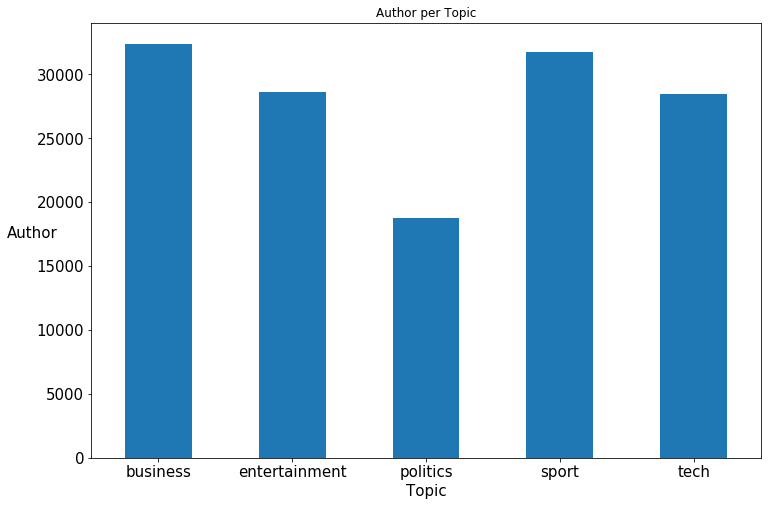

In [143]:
ax = final_frame.groupby('topic').count().author.plot(kind='bar',title='Author per Topic',figsize=(12,8),fontsize=15)
ax.set_ylabel('Author',fontsize=15,rotation='horizontal')
plt.xticks(rotation = 'horizontal',fontsize=15)
ax.set_xlabel('Topic',fontsize=15,rotation='horizontal')
plt.show()

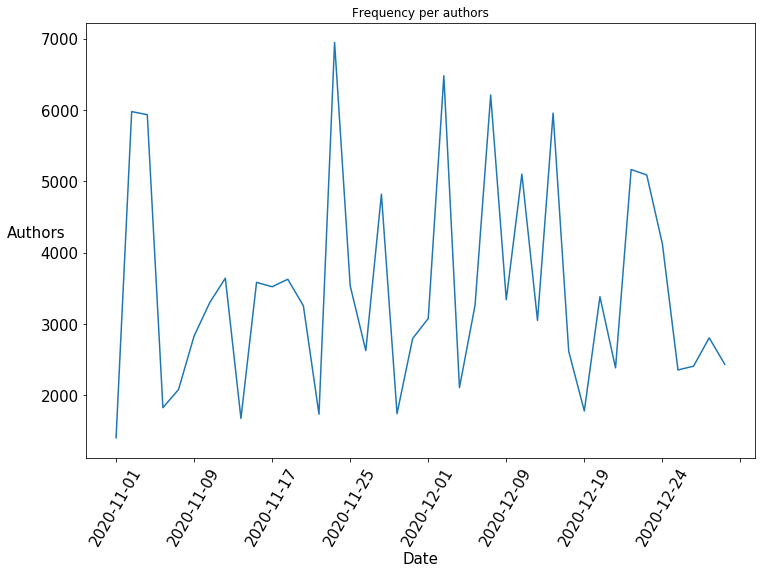

In [153]:
ax = final_frame.groupby('date').count().author.plot(title='Frequency per authors',figsize=(12,8),fontsize=15)
plt.xticks(rotation=60)
ax.set_ylabel('Authors',fontsize=15,rotation='horizontal')
ax.set_xlabel('Date',fontsize=15,rotation='horizontal')
plt.show()

### sentiment analysis on top 10 authors

In [154]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [155]:
senti = SentimentIntensityAnalyzer()

In [169]:
#since stage Tube , The Economist are not individual author removing them
# top_authors.pop(top_authors.index('Stage Tube'))
# top_authors.pop(top_authors.index('Stage Tube'))
#top_authors.pop(top_authors.index('FE Bureau'))

In [171]:
#selecting top 5 authors 
top_5_authors = top_authors[:5]

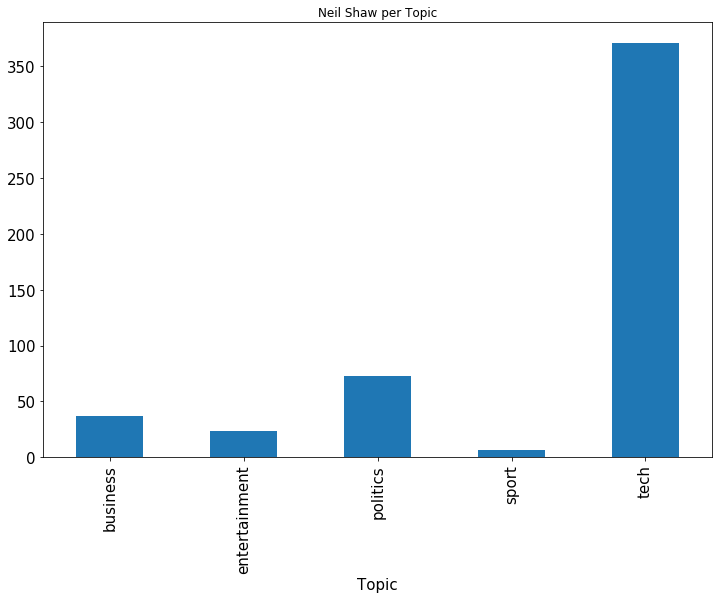

In [182]:
# qualities to show of each author
top = top_5_authors[0]
ax = final_frame[final_frame.author == top].groupby('topic').count().author.plot(kind = 'bar',title= top+' per Topic',figsize=(12,8),fontsize=15)
ax.set_xlabel('Topic',fontsize=15,rotation='horizontal')
plt.show()

In [183]:
author_frame = final_frame[final_frame.author==top]

In [186]:
author_frame.description.iloc[0]

'\n Two cities have around a 40 per cent chance of seeing snow on the big day\n '

In [187]:
senti.polarity_scores('\n Two cities have around a 40 per cent chance of seeing snow on the big day\n ')

{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.25}

In [188]:
author_frame.full_text.iloc[0]

" Odds on a White Christmas for each UK city as snow begins to fall There are always big stories on WalesOnline - don't miss any with our daily email When you subscribe we will use the information you provide to send you these newsletters. Sometimes they’ll include recommendations for other related newsletters or services we offer. OurPrivacy Noticeexplains more about how we use your data, and your rights. You can unsubscribe at any time. With snow hitting the UK today, new data from Gambling.com has revealed which cities are the most likely and least likely to experience a White Christmas. According to the latest odds from the bookies, Norwich is the city most likely to get snowfall in the UK and Ireland on Christmas Day, with the English city currently at 6/4 in the betting markets. This means there is a 40% possibility that there will be a White Christmas for Norwich residents to enjoy. Newcastle is a close second, with 7/4 odds meaning there's a 36.4% chance of snow in Newcastle on

In [189]:
senti.polarity_scores(" Odds on a White Christmas for each UK city as snow begins to fall There are always big stories on WalesOnline - don't miss any with our daily email When you subscribe we will use the information you provide to send you these newsletters. Sometimes they’ll include recommendations for other related newsletters or services we offer. OurPrivacy Noticeexplains more about how we use your data, and your rights. You can unsubscribe at any time. With snow hitting the UK today, new data from Gambling.com has revealed which cities are the most likely and least likely to experience a White Christmas. According to the latest odds from the bookies, Norwich is the city most likely to get snowfall in the UK and Ireland on Christmas Day, with the English city currently at 6/4 in the betting markets. This means there is a 40% possibility that there will be a White Christmas for Norwich residents to enjoy. Newcastle is a close second, with 7/4 odds meaning there's a 36.4% chance of snow in Newcastle on Christmas Day. City")

{'neg': 0.0, 'neu': 0.963, 'pos': 0.037, 'compound': 0.6852}

In [ ]:
#lets use description to calculate the average polarity as more data better results
